# Model Evaluation

In [1]:
%pip install numpy pandas scikit-learn matplotlib seaborn jupyter yfinance

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 4.8 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 12.0 MB/s  0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached protobuf-6.33.1-cp310-abi3-win_amd64.whl.metadata (593 bytes)
   -----------------------------------

## Boston Real Estate Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  scipy # for  scipy.stats.norm.pdf

<h3>Load data</h3>
Concerns housing values in suburbs of Boston.

<p>506 entries, 13 dimentions</p>
<p>Harrison, D. and Rubinfeld, D.L.<br> 
'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.</p>

<ul >
<li>CRIM     per capita crime rate by town</li>
<li>ZN       proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS    proportion of non-retail business acres per town</li>
<li>CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li>NOX      nitric oxides concentration (parts per 10 million)</li>
<li>RM       average number of rooms per dwelling</li>
<li>AGE      proportion of owner-occupied units built prior to 1940</li>
<li>DIS      weighted distances to five Boston employment centres</li>
<li>RAD      index of accessibility to radial highways</li>
<li>TAX      full-value property-tax rate per $10,000</li>
<li>PTRATIO  pupil-teacher ratio by town</li>
<li>B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li>LSTAT    % lower status of the population</li>
</ul>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>CRIM</th>
      <th>ZN</th>
      <th>INDUS</th>
      <th>CHAS</th>
      <th>NOX</th>
      <th>RM</th>
      <th>AGE</th>
      <th>DIS</th>
      <th>RAD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0.00632</td>
      <td>18</td>
      <td>2.31</td>
      <td>0</td>
      <td>0.538</td>
      <td>6.575</td>
      <td>65.2</td>
      <td>4.0900</td>
      <td>1</td>
    </tr>
    <tr>
      <td>0.02731</td>
      <td>0</td>
      <td>7.07</td>
      <td>0</td>
      <td>0.469</td>
      <td>6.421</td>
      <td>78.9</td>
      <td>4.9671</td>
      <td>2</td>
    </tr>
    <tr>
      <td>0.02729</td>
      <td>0</td>
      <td>7.07</td>
      <td>0</td>
      <td>0.469</td>
      <td>7.185</td>
      <td>61.1</td>
      <td>4.9671</td>
      <td>2</td>
    </tr>
    <tr>
      <td>0.03237</td>
      <td>0</td>
      <td>2.18</td>
      <td>0</td>
      <td>0.458</td>
      <td>6.998</td>
      <td>45.8</td>
      <td>6.0622</td>
      <td>3</td>
    </tr>
    <tr>
      <td>0.06905</td>
      <td>0</td>
      <td>2.18</td>
      <td>0</td>
      <td>0.458</td>
      <td>7.147</td>
      <td>54.2</td>
      <td>6.0622</td>
      <td>3</td>
    </tr>
  </tbody>
</table>

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>TAX</th>
      <th>PTRATIO</th>
      <th>B</th>
      <th>LSTAT</th>
      <th>MEDV</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>296</td>
      <td>15.3</td>
      <td>396.90</td>
      <td>4.98</td>
      <td>24.0</td>
    </tr>
    <tr>
      <td>242</td>
      <td>17.8</td>
      <td>396.90</td>
      <td>9.14</td>
      <td>21.6</td>
    </tr>
    <tr>
      <td>242</td>
      <td>17.8</td>
      <td>392.83</td>
      <td>4.03</td>
      <td>34.7</td>
    </tr>
    <tr>
      <td>222</td>
      <td>18.7</td>
      <td>394.63</td>
      <td>2.94</td>
      <td>33.4</td>
    </tr>
    <tr>
      <td>222</td>
      <td>18.7</td>
      <td>396.90</td>
      <td>5.33</td>
      <td>36.2</td>
    </tr>
  </tbody>
</table><p>Data contains 14 columns.


In [3]:
import sklearn.datasets
import pandas as pd
boston_db = pd.read_csv('local_data/boston_house_prices.csv')
#boston_db = sklearn.datasets.load_boston()
# print ('number of elements: {0:d}'.format(len(boston_db.target)))
# print ('Additional attributes: {0}'.format(boston_db['feature_names']))
# print ('Data size: {0}'.format(boston_db.data.shape))

In [4]:
boston_db.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

#### Create dataframe

In [5]:
#data = pd.DataFrame(boston_db.data, columns=boston_db['feature_names'])
y = boston_db['MEDV'] 
X= boston_db.drop(columns=['MEDV'])
#data=data.drop(columns=['AGE'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### Linear regression

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)
print('Regression finished with R^2={0:f}'.format(lm.score(X,y)))

Regression finished with R^2=0.740643


C:\Users\ler_s\AppData\Local\Temp\ipykernel_27184\1706640244.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


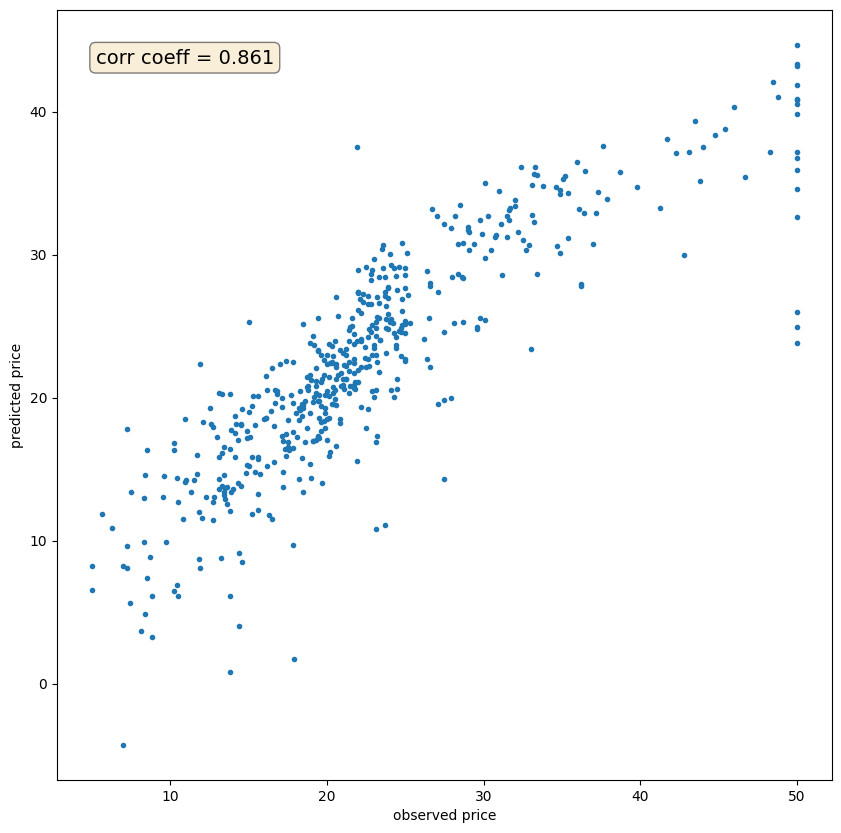

In [7]:
from scipy.stats.stats import pearsonr
predicted_y = lm.predict(X)
pearson_correlation = pearsonr(y,predicted_y) # compute pearson coefficient
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(y,predicted_y,'o',markersize=3)
plt.xlabel('observed price')
plt.ylabel('predicted price')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, 'corr coeff = {0:3.3f}'.format(pearson_correlation[0]), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.show()

$R^2$ : percentage variation in y which is explained by all the x variables together.<br>
$R^2$ equals to the square of pearson coefficient

In [8]:
print('Regression finished with R^2={0:4.4f}'.format(lm.score(X,y)))
pearson_correlation = pearsonr(y, predicted_y)
print(f'Pearson coefficient: correlation between true and predicted: {pearson_correlation[0]:4.4f} ')
print(f'Regression accuracy (R^2) estimated via pearson coefficient: {pearson_correlation[0]**2:4.4f} ')

Regression finished with R^2=0.7406
Pearson coefficient: correlation between true and predicted: 0.8606 
Regression accuracy (R^2) estimated via pearson coefficient: 0.7406 


### Liniar regression via Ordinary Least Squares (OLS)

In [9]:
import statsmodels.formula.api as smf
formula = 'MEDV ~ ' + '+'.join(X.columns)
smf_model = smf.ols(formula=formula, data=boston_db)
results = smf_model.fit()
print(f"formula:\t{formula}\n")
print (results.summary())

formula:	MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 18 Nov 2025   Prob (F-statistic):          6.72e-135
Time:                        19:00:56   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

### Get OLS results

In [10]:
print('Parameters: ', results.params)
print('Standard errors: ', results.bse)

Parameters:  Intercept    36.459488
CRIM         -0.108011
ZN            0.046420
INDUS         0.020559
CHAS          2.686734
NOX         -17.766611
RM            3.809865
AGE           0.000692
DIS          -1.475567
RAD           0.306049
TAX          -0.012335
PTRATIO      -0.952747
B             0.009312
LSTAT        -0.524758
dtype: float64
Standard errors:  Intercept    5.103459
CRIM         0.032865
ZN           0.013727
INDUS        0.061496
CHAS         0.861580
NOX          3.819744
RM           0.417925
AGE          0.013210
DIS          0.199455
RAD          0.066346
TAX          0.003761
PTRATIO      0.130827
B            0.002686
LSTAT        0.050715
dtype: float64


### Evaluate Regression Results

### Split data into training and test sets
The following cell splits the data into two parts: <br>
training_set_fraction of the randomly selected rows are assigned to the training set<br>
(1-training_set_fraction) of the randomly selected rows are assigned to the test set<br>

In [11]:
training_set_fraction = 0.6
#np.random.rand(10)
msk = np.random.rand(len(boston_db)) < training_set_fraction
data_train = boston_db[msk]
data_test = boston_db[~msk]
print ('Training set size: {0:d}\nTest set size: {1:d}'.format(len(data_train),len(data_test)))

Training set size: 312
Test set size: 194


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train,y_train)

In [15]:
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
print('MAE Test' ,mean_absolute_error(y_test,y_pred_test))
print('MAE Test' ,mean_squared_error(y_test,y_pred_test))


MAE Test 3.529677682827804
MAE Test 28.540018803940395


In [18]:
print('MAE Train' ,mean_absolute_error(y_train,y_pred_train))
print('MAE Train' ,mean_squared_error(y_train,y_pred_train))

MAE Train 3.199441118672391
MAE Train 20.658858112670067


### Train model on the subset of data

In [19]:
formula = 'MEDV ~ ' + '+'.join(X.columns)

smf_model = smf.ols(formula=formula, data=data_train)
results = smf_model.fit()
print(formula)
print (results.summary())

MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     62.33
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           6.41e-77
Time:                        19:00:56   Log-Likelihood:                -947.52
No. Observations:                 312   AIC:                             1923.
Df Residuals:                     298   BIC:                             1975.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

### Test prediction with the test set

C:\Users\ler_s\AppData\Local\Temp\ipykernel_27184\53297005.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


Accuracy score (R^2): 0.76


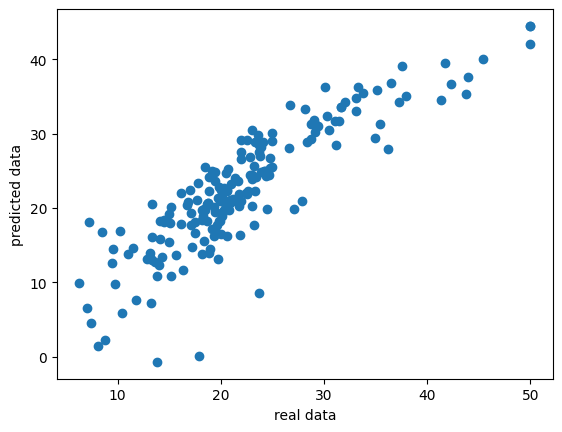

In [20]:
from scipy.stats.stats import pearsonr

y_predicted = results.predict(data_test)
plt.scatter(data_test['MEDV'],y_predicted)
plt.xlabel('real data'), plt.ylabel('predicted data')

pearson_correlation = pearsonr(data_test['MEDV'],y_predicted)# compute pearson coefficient
print(f'Accuracy score (R^2): {pearson_correlation[0]**2:2.2f}')
plt.show()

C:\Users\ler_s\AppData\Local\Temp\ipykernel_27184\4029258618.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


Pearson Correlation: 0.73


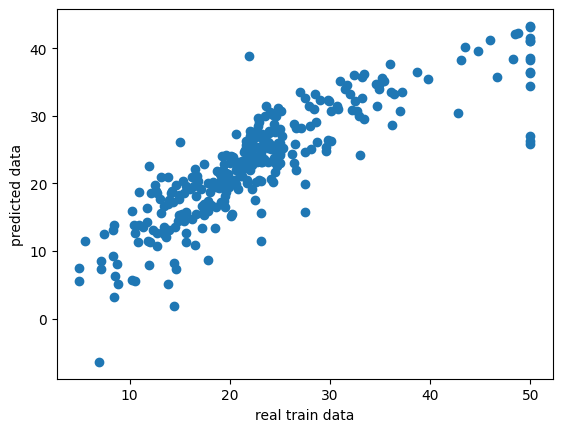

In [21]:
from scipy.stats.stats import pearsonr

y_predicted_train = results.predict(data_train)
plt.scatter(data_train['MEDV'],y_predicted_train)
plt.xlabel('real train data'), plt.ylabel('predicted data')

pearson_correlation = pearsonr(data_train['MEDV'],y_predicted_train)# compute pearson coefficient
print(f'Pearson Correlation: {pearson_correlation[0]**2:2.2f}')
plt.show()

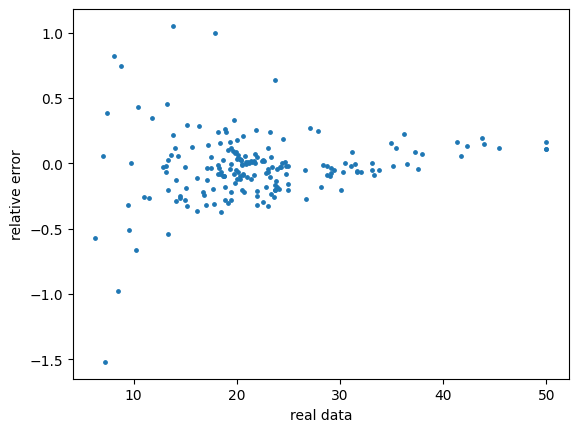

Mean prediction relative error: 0.168 std:0.261


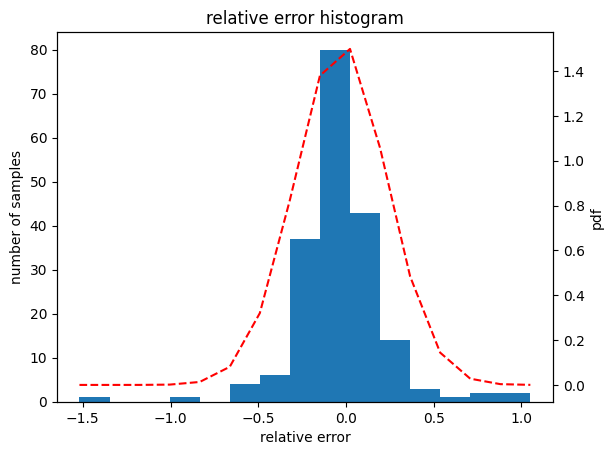

In [22]:
prediction_errors = (data_test['MEDV']-y_predicted)/data_test['MEDV'] # relative errors

plt.figure()
plt.scatter(data_test['MEDV'], prediction_errors ,s=6)
plt.xlabel('real data'), plt.ylabel('relative error')
plt.show()

print(f'Mean prediction relative error: {prediction_errors.abs().mean():3.3f} std:{np.std(prediction_errors):3.3f}')

fig, ax = plt.subplots()
n, bins, patches = ax.hist(prediction_errors,15,density=False)
# generate normal distribution with given mean & std. 
norm_pdf =  scipy.stats.norm.pdf(bins, np.mean(prediction_errors), np.std(prediction_errors))
ax2 = ax.twinx()
ax2.plot(bins,norm_pdf,'r--')

ax.set_xlabel('relative error'), ax.set_ylabel('number of samples'); ax2.set_ylabel('pdf');
plt.title('relative error histogram')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
test_mse=mean_squared_error(data_test['MEDV'], y_predicted)
test_mae=mean_absolute_error(data_test['MEDV'], y_predicted)
test_mape=mean_absolute_percentage_error(data_test['MEDV'], y_predicted)

train_mse=mean_squared_error(data_train['MEDV'], y_predicted_train)
train_mae=mean_absolute_error(data_train['MEDV'], y_predicted_train)
train_mape=mean_absolute_percentage_error(data_train['MEDV'], y_predicted_train)

print(f'Test mean squared error: {test_mse:.3f}')
print(f'Train mean squared error: {train_mse:.3f}')
print(f'Test mean absolute error: {test_mae:.3f}')
print(f'Train mean absolute error: {train_mae:.3f}')
print(f'Test mean absolute percentage error: {test_mape:.3f}')
print(f'Trainean absolute percentage error: {train_mape:.3f}')

Test mean squared error: 17.346
Train mean squared error: 25.430
Test mean absolute error: 3.101
Train mean absolute error: 3.562
Test mean absolute percentage error: 0.168
Trainean absolute percentage error: 0.176


## ROC-AUC-Illustration

In [24]:
import numpy as np
import matplotlib.pyplot as plt

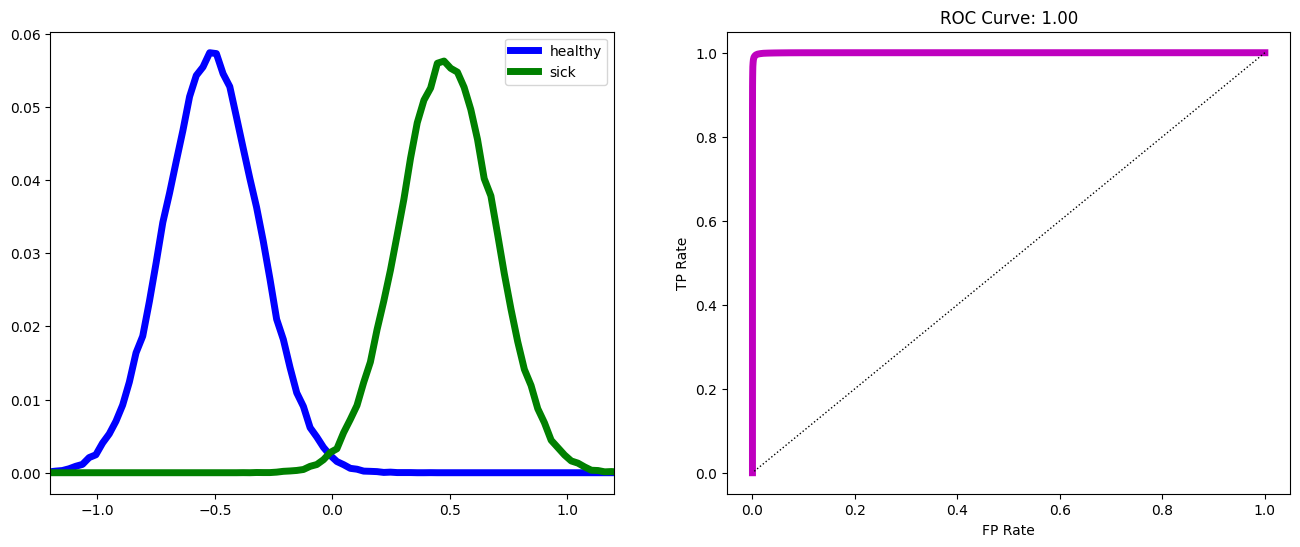

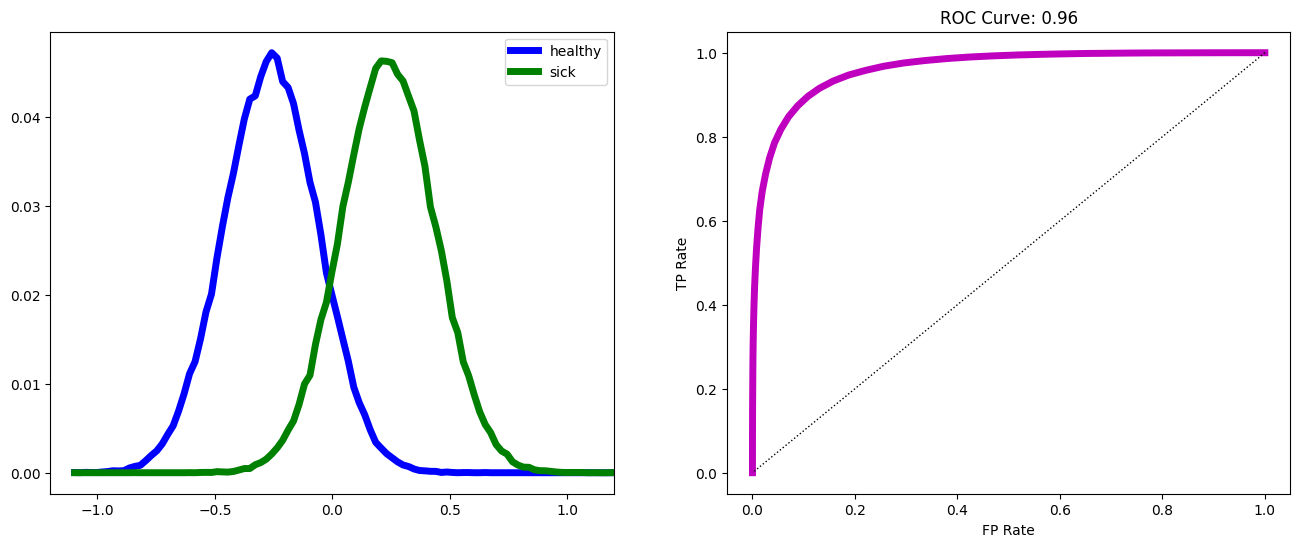

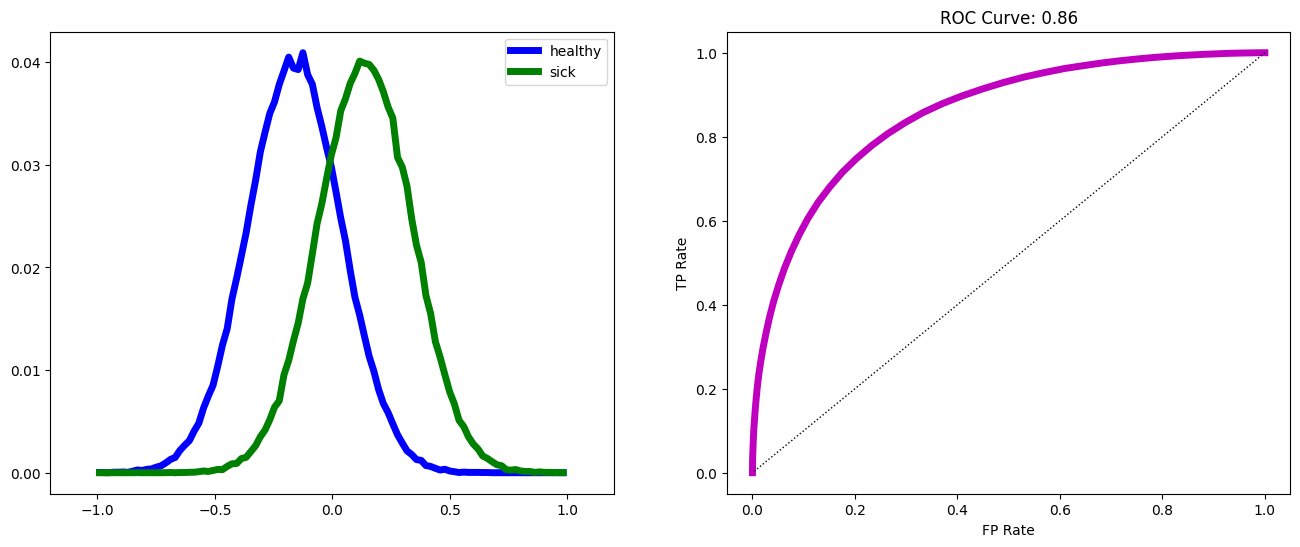

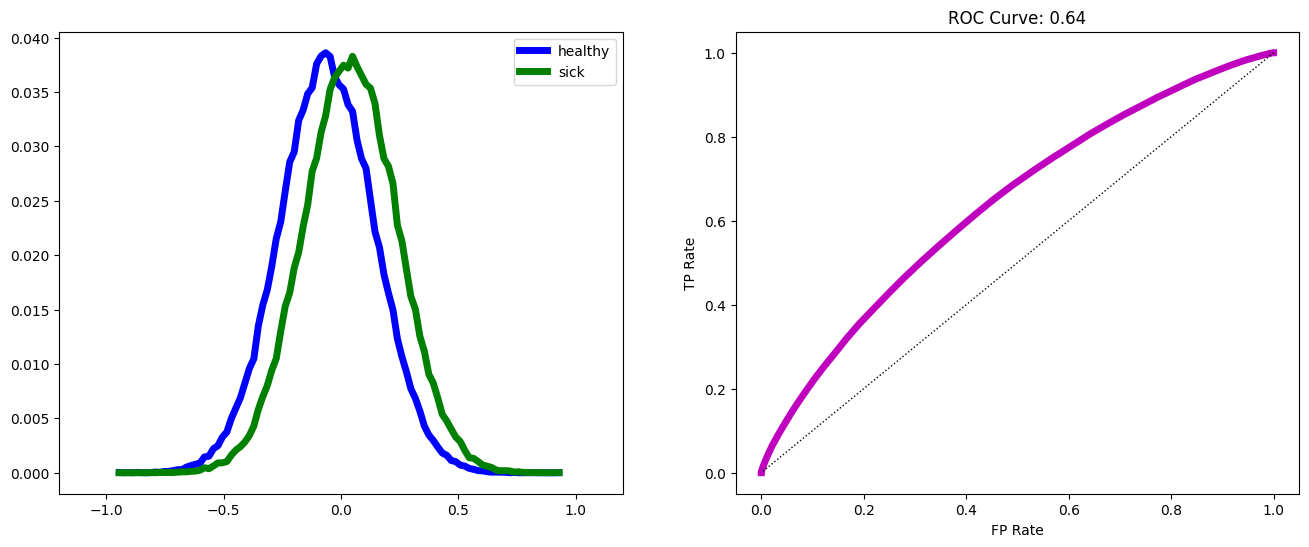

In [25]:
def display_results(d1, d2, sub_folder, res_file_name):
    from statsmodels.discrete.discrete_model import Logit
    import os
    from sklearn.metrics import auc
    sample_size=100000
    

    y1 = np.random.normal(loc=d1[0],scale= d1[1], size=sample_size)
    y2 = np.random.normal(loc=d2[0],scale=d2[1],  size=sample_size)
    
    x = np.linspace( np.min(np.hstack( (y1,y2))), np.max(np.hstack( (y1,y2))), 100)
    y1_h,_ = np.histogram(y1,x)
    y2_h,_ = np.histogram(y2,x)

    fig,axes = plt.subplots( nrows=1, ncols=2, figsize=(16,6) )
    axes[0].plot(x[:-1],y1_h/np.sum(y1_h), linewidth=5, color='b', label='healthy')
    axes[0].plot(x[:-1],y2_h/np.sum(y1_h), linewidth=5, color='g', label='sick')
    axes[0].set_xlim((-1.2,1.2))
    axes[0].legend()
    
    TP = np.zeros(x.shape)
    FP = np.zeros(x.shape)
    for i, threshold in enumerate(x):
        TP[i] = np.mean(y2>threshold)
        FP[i] = np.mean(y1>threshold)
    axes[1].plot(FP, TP, linewidth=5, color='m')
    axes[1].plot(FP, FP, linewidth=1, color='k',linestyle=':')    
    axes[1].set_title(f'ROC Curve: {auc(FP, TP):2.2f}'); axes[1].set_xlabel('FP Rate'); axes[1].set_ylabel('TP Rate');
    fig.savefig(os.path.join(sub_folder, f'{res_file_name}.png'))

display_results( (-0.5, 0.2), (0.5, 0.2),'local_data',1)
display_results( (-0.25, 0.2), (0.25, 0.2),'local_data',2)
display_results( (-0.15, 0.2), (0.15, 0.2),'local_data',3)
display_results( (-0.05, 0.2), (0.05, 0.2),'local_data',4)

## Boston Real Estate Analysis - Logistic Regression

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  scipy # for  scipy.stats.norm.pdf
boston_db = pd.read_csv('local_data/boston_house_prices.csv')

<h3>Load data</h3>
Concerns housing values in suburbs of Boston.

<p>506 entries, 13 dimentions</p>
<p>Harrison, D. and Rubinfeld, D.L.<br> 
'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.</p>

<ul >
<li>CRIM     per capita crime rate by town</li>
<li>ZN       proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS    proportion of non-retail business acres per town</li>
<li>CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li>NOX      nitric oxides concentration (parts per 10 million)</li>
<li>RM       average number of rooms per dwelling</li>
<li>AGE      proportion of owner-occupied units built prior to 1940</li>
<li>DIS      weighted distances to five Boston employment centres</li>
<li>RAD      index of accessibility to radial highways</li>
<li>TAX      full-value property-tax rate per $10,000</li>
<li>PTRATIO  pupil-teacher ratio by town</li>
<li>B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li>LSTAT    % lower status of the population</li>
</ul>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>CRIM</th>
      <th>ZN</th>
      <th>INDUS</th>
      <th>CHAS</th>
      <th>NOX</th>
      <th>RM</th>
      <th>AGE</th>
      <th>DIS</th>
      <th>RAD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0.00632</td>
      <td>18</td>
      <td>2.31</td>
      <td>0</td>
      <td>0.538</td>
      <td>6.575</td>
      <td>65.2</td>
      <td>4.0900</td>
      <td>1</td>
    </tr>
    <tr>
      <td>0.02731</td>
      <td>0</td>
      <td>7.07</td>
      <td>0</td>
      <td>0.469</td>
      <td>6.421</td>
      <td>78.9</td>
      <td>4.9671</td>
      <td>2</td>
    </tr>
    <tr>
      <td>0.02729</td>
      <td>0</td>
      <td>7.07</td>
      <td>0</td>
      <td>0.469</td>
      <td>7.185</td>
      <td>61.1</td>
      <td>4.9671</td>
      <td>2</td>
    </tr>
    <tr>
      <td>0.03237</td>
      <td>0</td>
      <td>2.18</td>
      <td>0</td>
      <td>0.458</td>
      <td>6.998</td>
      <td>45.8</td>
      <td>6.0622</td>
      <td>3</td>
    </tr>
    <tr>
      <td>0.06905</td>
      <td>0</td>
      <td>2.18</td>
      <td>0</td>
      <td>0.458</td>
      <td>7.147</td>
      <td>54.2</td>
      <td>6.0622</td>
      <td>3</td>
    </tr>
  </tbody>
</table>

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>TAX</th>
      <th>PTRATIO</th>
      <th>B</th>
      <th>LSTAT</th>
      <th>MEDV</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>296</td>
      <td>15.3</td>
      <td>396.90</td>
      <td>4.98</td>
      <td>24.0</td>
    </tr>
    <tr>
      <td>242</td>
      <td>17.8</td>
      <td>396.90</td>
      <td>9.14</td>
      <td>21.6</td>
    </tr>
    <tr>
      <td>242</td>
      <td>17.8</td>
      <td>392.83</td>
      <td>4.03</td>
      <td>34.7</td>
    </tr>
    <tr>
      <td>222</td>
      <td>18.7</td>
      <td>394.63</td>
      <td>2.94</td>
      <td>33.4</td>
    </tr>
    <tr>
      <td>222</td>
      <td>18.7</td>
      <td>396.90</td>
      <td>5.33</td>
      <td>36.2</td>
    </tr>
  </tbody>
</table><p>Data contains 14 columns.


In [27]:
#import sklearn.datasets
#boston_db = sklearn.datasets.load_boston()
print ('number of elements: {0:d}'.format(len(boston_db['MEDV'])))
print ('Additional attributes: {0}'.format(boston_db.columns))
print ('Data size: {0}'.format(boston_db.shape))

number of elements: 506
Additional attributes: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
Data size: (506, 14)


### Create dataframe

Set target value to True if price above mean

In [28]:
boston_db['price_above_mean'] = boston_db['MEDV'] > boston_db['MEDV'].mean()
boston_db.drop(columns=['MEDV'], inplace = True)
X = boston_db.drop(columns=['price_above_mean'])
y = boston_db['price_above_mean']

### Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X,y)
print('Regression finished with R^2={0:f}'.format(lr.score(X,y)))

Regression finished with R^2=0.887352


### Evaluate Logistic Regression Results

#### Split data into training and test sets
The following cell splits the data into two parts: <br>
training_set_fraction of the randomly selected rows are assigned to the training set<br>
(1-training_set_fraction) of the randomly selected rows are assigned to the test set<br>

In [30]:
training_set_fraction = 0.6
msk = np.random.rand(len(boston_db)) < training_set_fraction
data_train = boston_db[msk]
data_test = boston_db[~msk]
print ('Training set size: {0:d}\nTest set size: {1:d}'.format(len(data_train),len(data_test)))

Training set size: 297
Test set size: 209


#### Train model on the subset of data

In [31]:
y_train=data_train['price_above_mean']
X_train=data_train.drop(columns='price_above_mean')
y_test=data_test['price_above_mean']
X_test=data_test.drop(columns='price_above_mean')

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
model_lr=lr.fit(X_train,y_train)

#### Test prediction with the test set

In [33]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
predictions=model_lr.predict(X_test)


In [34]:
cm=confusion_matrix(y_test,predictions)
pre=precision_score(y_test,predictions)
rec=recall_score(y_test,predictions)
f1=f1_score(y_test,predictions)
auc=roc_auc_score(y_test,predictions)

In [35]:
print(f'Precision score: {pre:3.3f}')
print(f'Recall score: {rec:3.3f}')
print(f'F1 score: {f1:3.3f}')
print(f'AUC score: {auc:3.3f}')
print ('Confusion matrix:')
print(cm)

Precision score: 0.741
Recall score: 0.829
F1 score: 0.783
AUC score: 0.832
Confusion matrix:
[[111  22]
 [ 13  63]]


In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train,y_train)
predictions_dt=dt_clf.predict(X_test)

In [37]:
cm_dt=confusion_matrix(y_test,predictions_dt)
pre_dt=precision_score(y_test,predictions_dt)
rec_dt=recall_score(y_test,predictions_dt)
f1_dt=f1_score(y_test,predictions_dt)
auc_dt=roc_auc_score(y_test,predictions_dt)
print(f'DT Precision score: {pre_dt:3.3f}')
print(f'DT Recall score: {rec_dt:3.3f}')
print(f'DT F1 score: {f1_dt:3.3f}')
print(f'DT AUC score: {auc_dt:3.3f}')
print ('DT Confusion matrix:')
print(cm_dt)

DT Precision score: 0.800
DT Recall score: 0.842
DT F1 score: 0.821
DT AUC score: 0.861
DT Confusion matrix:
[[117  16]
 [ 12  64]]


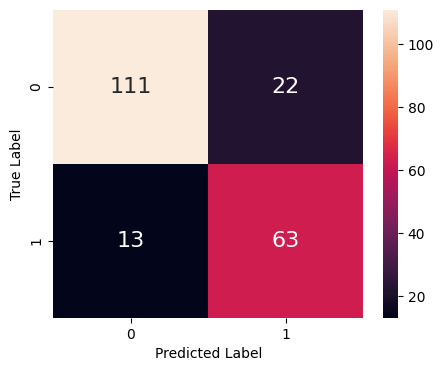

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True,fmt="d",annot_kws={"size": 16})# font size
plt.xlabel('Predicted Label'); plt.ylabel('True Label');

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.90      0.83      0.86       133
        True       0.74      0.83      0.78        76

    accuracy                           0.83       209
   macro avg       0.82      0.83      0.82       209
weighted avg       0.84      0.83      0.83       209



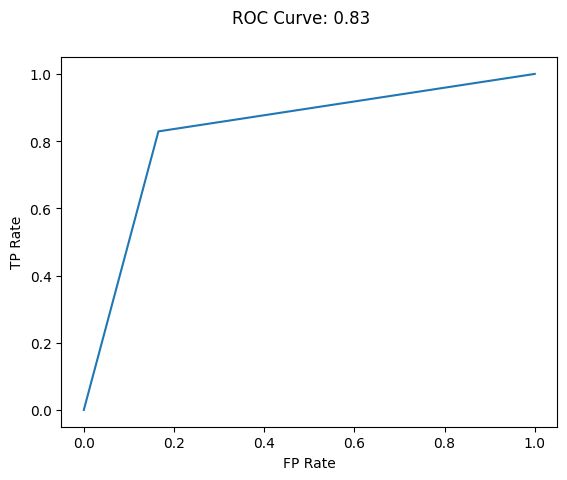

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
roc = roc_curve(y_test,predictions)
fpr, tpr, thresholds = roc
plt.plot(fpr,tpr)
plt.suptitle(f'ROC Curve: {auc:2.2f}');plt.xlabel('FP Rate'); plt.ylabel('TP Rate')
plt.show()

#### Use 10-folds Cross-validation 

In [41]:
from sklearn.model_selection import cross_val_score
y_data=boston_db['price_above_mean']
X_data=boston_db.drop(columns='price_above_mean')
model=LogisticRegression(solver='lbfgs', max_iter=10000)
scores = cross_val_score(model, X_data, y_data, cv=10, scoring='precision')
print("precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
model.fit(X_data,y_data)

precision: 0.83 (+/- 0.26)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [42]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [43]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

# 1. Download stock data (Apple as example)
df = yf.download("AAPL", start="2015-01-01", end="2020-01-01")
df = df[['Close']]  # we'll use closing prices
X = df.index.values.reshape(-1, 1)  # dates as "features" (for split demo)
y = df['Close'].values

# 2. Apply TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

for i, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"Split {i+1}")
    print("Train range:", df.index[train_idx[0]], "→", df.index[train_idx[-1]])
    print("Test range :", df.index[test_idx[0]], "→", df.index[test_idx[-1]])
    print()


C:\Users\ler_s\AppData\Local\Temp\ipykernel_27184\2832957611.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2020-01-01")
[*********************100%***********************]  1 of 1 completed

Split 1
Train range: 2015-01-02 00:00:00 → 2015-11-04 00:00:00
Test range : 2015-11-05 00:00:00 → 2016-09-02 00:00:00

Split 2
Train range: 2015-01-02 00:00:00 → 2016-09-02 00:00:00
Test range : 2016-09-06 00:00:00 → 2017-07-05 00:00:00

Split 3
Train range: 2015-01-02 00:00:00 → 2017-07-05 00:00:00
Test range : 2017-07-06 00:00:00 → 2018-05-03 00:00:00

Split 4
Train range: 2015-01-02 00:00:00 → 2018-05-03 00:00:00
Test range : 2018-05-04 00:00:00 → 2019-03-05 00:00:00

Split 5
Train range: 2015-01-02 00:00:00 → 2019-03-05 00:00:00
Test range : 2019-03-06 00:00:00 → 2019-12-31 00:00:00

